# Top

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom
import finance_utils as fu
import stock_db_mgr as sdm

In [3]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [13, 5]

In [4]:
# Set seaborn plot theme:
sns.set_theme()

# Top Performer Strategy

* Make sure TSX symbol list are up to date
* Download all TSX data
* Create DB on TSX
* Get close price on all symbols
* Remove symbols that don't have valid last date data
* Keep symbols with sufficient data
* Fill NaN data

## DB creation

In [5]:
db = sdm.StockDBMgr('stock_db/tsx')

## Get close price

In [6]:
dfa = db.get_all_symbol_single_data_item('Close')

In [7]:
dfa.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,,,,,,,,
ABX.TO,7145.0,24.029201,7.248308,7.048789,19.030626,22.904671,28.014879,45.278164
AC.TO,3315.0,15.162522,11.748727,0.820000,3.515000,13.240000,23.165000,52.090000
ACB.TO,1681.0,42.814694,46.807897,0.670000,8.080000,24.240000,84.239998,180.839996
ACO-X.TO,7147.0,19.683165,13.839052,1.694719,6.533317,16.285465,33.807743,47.128162
AEM.TO,7145.0,34.724360,22.370956,3.492448,13.955750,31.953285,51.909447,105.389000
...,...,...,...,...,...,...,...,...
WPRT.TO,5947.0,124.575129,131.033752,9.100000,35.000000,63.599998,180.300003,805.000000
WSP.TO,2371.0,78.538646,48.741370,24.834866,37.286982,62.936764,117.156445,184.970398
WTE.TO,4943.0,13.742975,7.582129,1.949557,6.001154,14.337665,18.982525,35.544537


## Keep symbols with sufficient data

In [8]:
# how many NAN remains when keeping only stocks 10 years old and older
fu.clean_dataframe(dfa, '2013-01-01').isna().mul(1).sum().sum()

30

<Axes: xlabel='Date'>

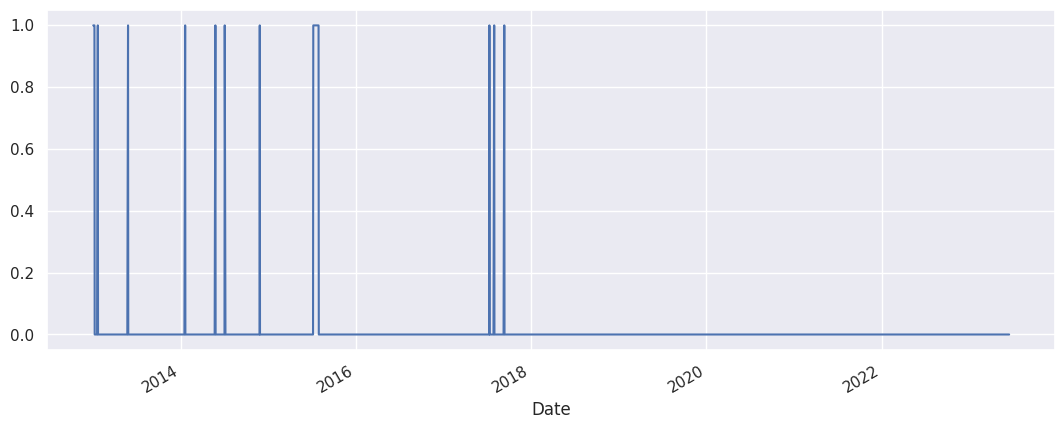

In [9]:
# nb of nan symbols at each dates
fu.clean_dataframe(dfa, '2013-01-01').isna().mul(1).sum(1).plot()

In [10]:
# clean & fill nan
dfv = fu.fill_nan_data(fu.clean_dataframe(dfa, '2013-01-01'))

In [11]:
dfv.notna().all().all()

True

## Analysis parameters

In [12]:
# parameters
# i: start day
# d: duration increment
i = 0
d = 253 # About 253 trading days per year

In [13]:
# Nb of symbols
n = len(dfv.columns)

In [14]:
# Nb of best symbols to keep
k = 5

In [15]:
dfv.iloc[i : i + d]

Close,ABX.TO,AC.TO,ACO-X.TO,AEM.TO,AGI.TO,AIF.TO,ALA.TO,AP-UN.TO,AQN.TO,ARE.TO,...,WDO.TO,WEED.TO,WELL.TO,WFG.TO,WN.TO,WPK.TO,WPM.TO,WPRT.TO,WTE.TO,X.TO
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,29.601265,1.78,28.754429,44.320339,16.194073,6.490455,19.120020,21.595827,4.326761,7.612666,...,0.87,0.25,0.14,33.832371,57.783161,12.271808,31.492928,280.000000,17.480108,2.416806
2013-01-03,28.757439,1.78,28.736544,42.799297,15.622196,6.490455,19.023767,21.245106,4.363376,7.584449,...,0.85,0.25,0.14,33.359703,57.455288,12.271808,30.364183,290.799988,18.066563,2.416806
2013-01-04,28.808064,1.77,28.614950,42.345505,15.186481,6.616486,19.040751,21.550358,4.357274,7.669111,...,0.86,0.25,0.14,33.764198,57.774982,12.271808,30.390024,285.200012,18.211594,2.416806
2013-01-07,28.327093,1.86,28.611370,41.034550,15.604043,6.663745,18.916176,21.219114,4.393891,7.923100,...,0.85,0.25,0.14,34.086887,56.783092,12.263484,29.433603,279.500000,17.776484,2.404011
2013-01-08,27.964245,1.99,28.876030,41.463135,14.959547,6.616486,18.904861,21.206127,4.369479,8.000710,...,0.85,0.25,0.14,34.841335,56.250275,12.338364,30.036747,270.600006,17.871075,2.404959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,16.282526,7.49,33.847160,24.654217,11.819326,14.010579,23.931469,21.747850,4.686949,11.484457,...,0.63,0.05,0.22,47.023647,64.875412,19.139311,19.248640,208.600006,22.690550,2.792234
2013-12-30,15.864132,7.47,33.868980,23.824930,11.533749,14.052255,23.943260,21.883268,4.680553,11.643562,...,0.60,0.05,0.22,47.224865,65.186539,19.038889,18.634508,208.600006,22.875027,2.819494
2013-12-31,16.308674,7.41,33.927166,24.213657,11.856180,14.002245,24.037582,22.181177,4.693345,11.636331,...,0.58,0.05,0.22,47.375782,65.169731,18.796192,18.818747,207.899994,22.802553,2.838965


## Test run

### Return for all - current period

In [16]:
fu.normalize_dataframe(dfv.iloc[i : i + d]).iloc[-1].div(n).sum() - 1

0.17443648345715435

### Find best performing stocks

In [17]:
b = fu.normalize_dataframe(dfv.iloc[i : i + d]).iloc[-1].sub(1).sort_values(ascending=False).iloc[:k]
b

Close
AC.TO      3.213483
BLDP.TO    2.177419
BDGI.TO    1.839357
AIF.TO     1.145802
BHC.TO     1.078386
Name: 2014-01-03 00:00:00, dtype: float64

### Return for best - current period

In [18]:
fu.normalize_dataframe(dfv[b.index].iloc[i : i + d]).iloc[-1].div(k).sum() - 1

1.8908893540967546

### Return for all - next period

In [19]:
fu.normalize_dataframe(dfv.iloc[i + d : i + 2 * d]).iloc[-1].div(n).sum() - 1

0.3872424168927864

### Return for best - next period

In [20]:
fu.normalize_dataframe(dfv[b.index].iloc[i + d : i + 2 * d]).iloc[-1].div(k).sum() - 1

0.21771837907228786

In [21]:
# ... oops...

# need to try other time period, other duration...

## Function to automate

In [22]:
len(dfv)

2625

In [50]:
d = 100
i = 3 * d

In [51]:
fu.normalize_dataframe(dfv.iloc[i : i + d]).iloc[-1].sub(1).describe()

count    183.000000
mean       0.361265
std        3.872412
min       -0.344125
25%       -0.003207
50%        0.067874
75%        0.141777
max       52.400000
Name: 2014-08-05 00:00:00, dtype: float64

In [52]:
fu.normalize_dataframe(dfv.iloc[i : i + d]).iloc[-1].sub(1).pipe(lambda x: x[x > x.mean()]).count()

8

<Axes: ylabel='Frequency'>

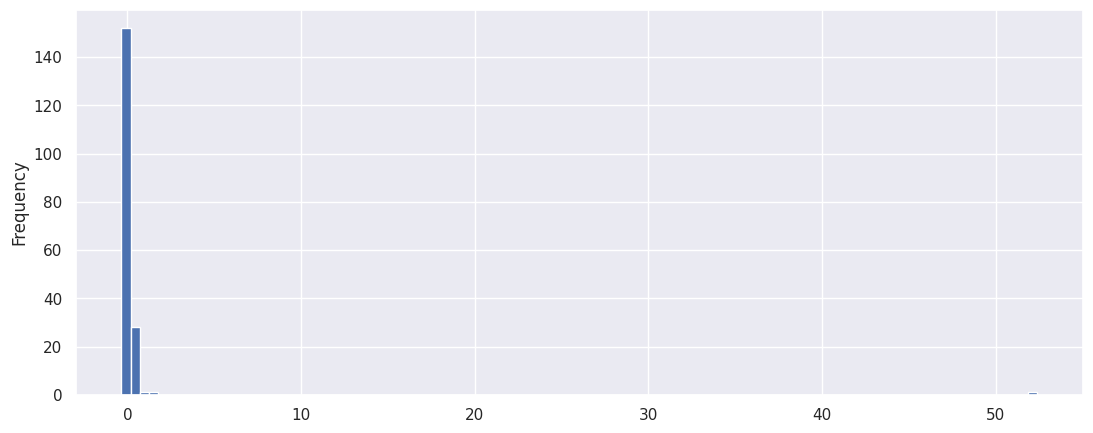

In [55]:
fu.normalize_dataframe(dfv.iloc[i : i + d]).iloc[-1].sub(1) \
.plot.hist(bins=100)
#.pipe(lambda x: x[x > x.mean()]).count()
#.skew()


In [56]:
def top_performer(df, k, d):
    n = len(df.columns)

    # output df
    dfo = pd.DataFrame(columns=["GAC", "GBC", "GAN", "GBN", "NAM", "ACstd", "ACskew", "ACkurt"])
    dfo.rename_axis('Parameters', axis='columns')
    dfo.rename_axis('Dates', axis='index')

    for i in range(0, len(df) - 2 * d, d):
        # df normalized, current period
        dfnc = fu.normalize_dataframe(df.iloc[i : i + d])

        # gain for all symbols, current period
        gac = dfnc.iloc[-1].sub(1).mean()

        nb_above_mean = fu.normalize_dataframe(df.iloc[i : i + d]).iloc[-1].sub(1).pipe(lambda x: x[x > x.mean()]).count()

        # best symbols
        b = dfnc.iloc[-1].sub(1).sort_values().iloc[-k:].index

        # gain of k best symbols, current period
        gbc = dfnc[b].iloc[-1].mean()

        # gain for all symbols, next period
        gan = fu.normalize_dataframe(df.iloc[i + d : i + 2 * d]) \
            .iloc[-1].sub(1).mean()

        # gain of k best symbols, next period
        gbn = fu.normalize_dataframe(df[b].iloc[i + d : i + 2 * d]) \
            .iloc[-1].sub(1).mean()

        dfo.loc[df.iloc[i].name] = [gac, gbc, gan, gbn, nb_above_mean, dfnc.iloc[-1].sub(1).std(), dfnc.iloc[-1].sub(1).skew(), dfnc.iloc[-1].sub(1).kurt()]
        #print("{: 9.2f}% {: 9.2f}% {: 9.2f}%  {}".format(gac * 100, gbc * 100, gbn * 100, nb_above_mean))

    return dfo

In [59]:
top_performer(dfv, 5, 253)
#top_performer(dfv, 10, 100)

,GAC,GBC,GAN,GBN,NAM,ACstd,ACskew,ACkurt
2013-01-02,0.174436,2.890889,0.387242,0.217718,86.0,0.498918,1.644918,8.243980
2014-01-06,0.387242,11.283839,-0.084781,-0.103592,30.0,3.228558,13.147062,175.865103
2015-01-08,-0.084781,1.832856,0.617506,0.255143,94.0,0.318035,0.531107,1.164801
2016-01-12,0.617506,6.191127,0.144565,1.004705,46.0,1.014912,3.592185,16.173581
2017-01-13,0.144565,2.782173,-0.030674,-0.152241,72.0,0.385853,2.845120,14.913117
2018-01-17,-0.030674,1.829325,0.270205,0.776928,81.0,0.259766,1.013959,4.142691
2019-01-21,0.270205,3.111146,0.225204,1.651991,82.0,0.444898,2.356927,10.221593
2020-01-23,0.225204,4.352178,0.195757,-0.132972,58.0,0.670461,3.462507,15.239886
2021-01-26,0.195757,3.086496,0.038518,0.413998,84.0,0.492139,1.788407,5.717040
